In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('SOCR-HeightWeight (1).csv')
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [4]:
df=df.drop('Index',axis=1)

In [5]:
df.head()

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


In [6]:
df.describe()

,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000
mean,67.993114,127.079421
std,1.901679,11.660898
min,60.278360,78.014760
25%,66.704397,119.308675
50%,67.995700,127.157750
75%,69.272958,134.892850
max,75.152800,170.924000


In [7]:
df.shape

(25000, 2)

In [8]:
df.isnull().sum()

Height(Inches)    0
Weight(Pounds)    0
dtype: int64

In [9]:
#Splitting the dependent and independent feature....
y=df[['Weight(Pounds)']]
X=df[['Height(Inches)']]

In [10]:
X.shape,y.shape

((25000, 1), (25000, 1))

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [13]:
X_train.shape

(18750, 1)

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
Scaler=StandardScaler()

In [16]:
X_train=Scaler.fit_transform(X_train)

In [17]:
X_train

array([[ 1.04422761],
       [-1.26515425],
       [-1.45158213],
       ...,
       [ 0.2108769 ],
       [ 0.68769241],
       [-0.45684105]])

In [18]:
X_test=Scaler.transform(X_test)

In [19]:
X_test

array([[ 0.22723439],
       [-0.05128615],
       [-0.17655812],
       ...,
       [ 0.66083975],
       [-1.80229195],
       [-2.34404669]])

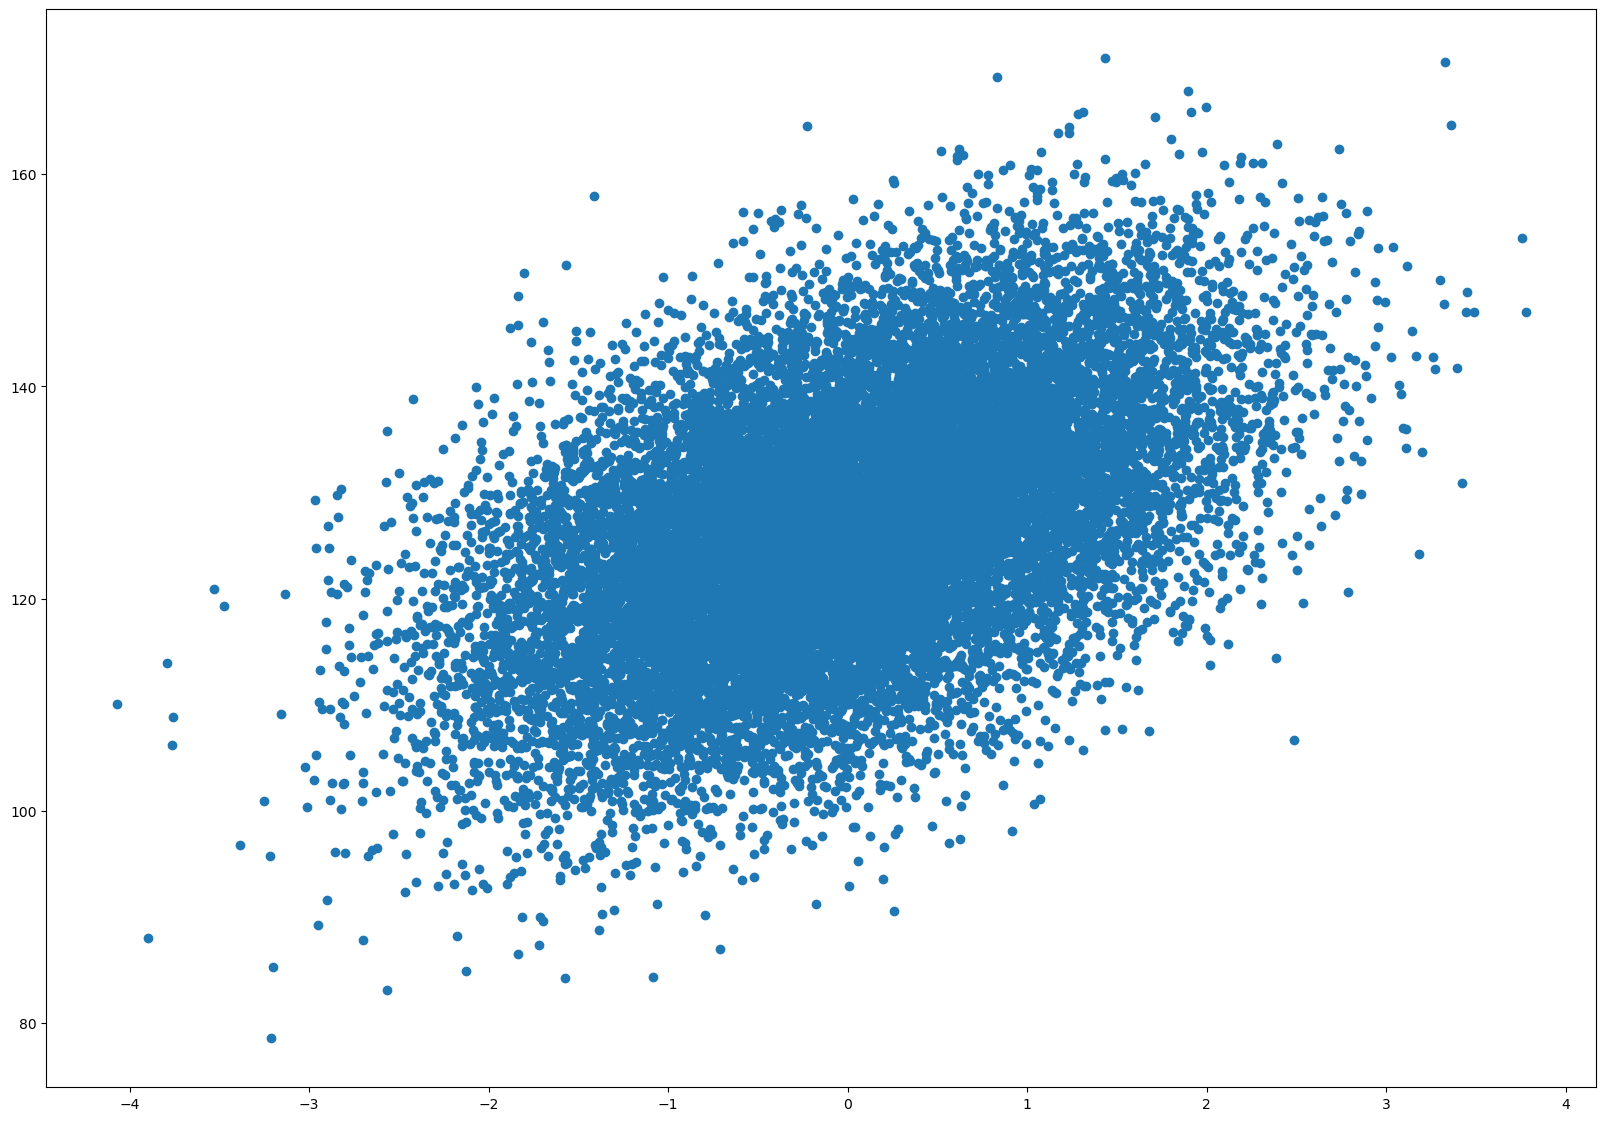

In [20]:
plt.figure(figsize=(20,14))
plt.scatter(X_train,y_train)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
regressor=LinearRegression()

In [23]:
regressor.fit(X_train,y_train)

LinearRegression()

In [24]:
regressor.intercept_

array([127.0692464])

In [25]:
regressor.coef_

array([[5.82227372]])

Text(0.5, 1.0, 'Best fit line')

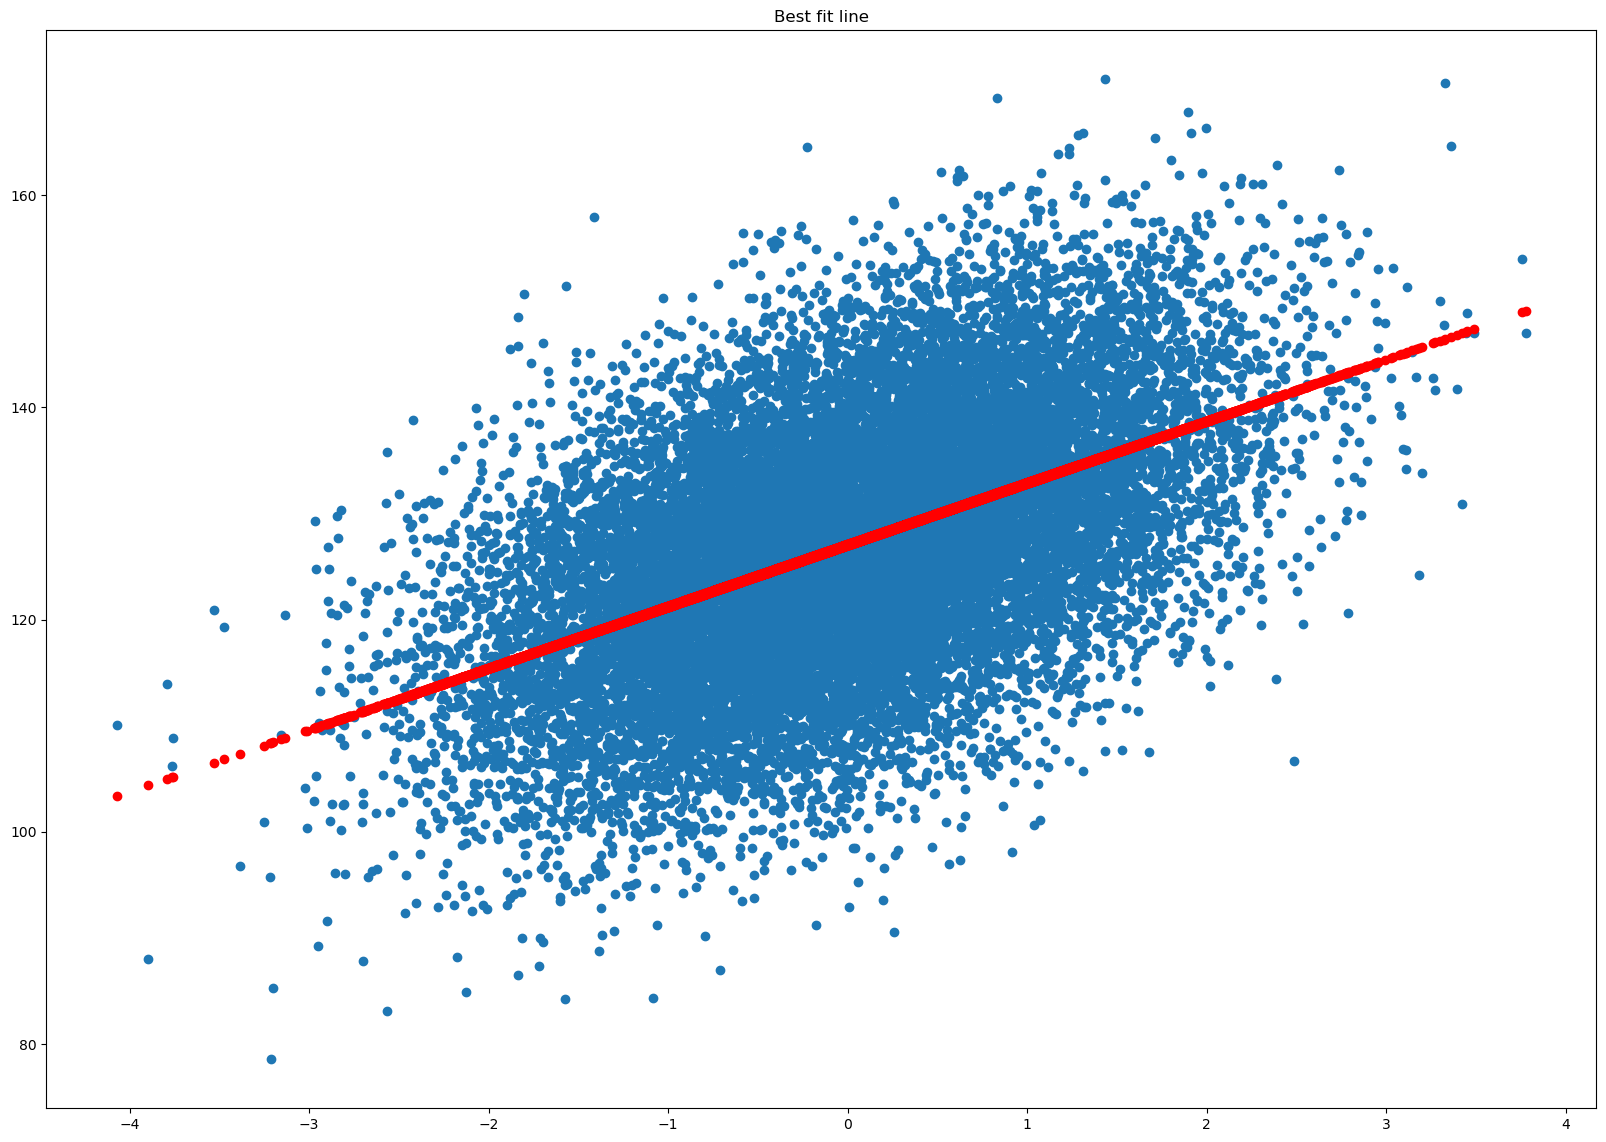

In [26]:
plt.figure(figsize=(20,14))
plt.scatter(X_train,y_train)
plt.scatter(X_train,regressor.predict(X_train),color='red')
plt.title('Best fit line')

In [27]:
y_pred=regressor.predict(X_test)

In [28]:
y_pred

array([[128.39226723],
       [126.77064442],
       [126.04127668],
       ...,
       [130.9168363 ],
       [116.57580932],
       [113.42156495]])

In [29]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [30]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)

In [31]:
mse,mae,rmse

(102.3469851206479, 8.041117903549644, 10.116668677022487)

In [39]:
#r_score to check performance
from sklearn.metrics import r2_score

In [38]:
score=r2_score(y_test,y_pred)

In [37]:
score

0.2593047494927634

In [40]:
#Display adjusted r-squared
1-(1-score)*(len(y_test-1))/(len(y_test)-X_test.shape[1]-1)

0.2590676511411285

In [41]:
Scaler

StandardScaler()

In [42]:
regressor

LinearRegression()